In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

In [10]:
#load data
seq_freq = pd.read_csv("nochim_sequences.csv", index_col=0).transpose()
seq_freq = seq_freq.rename(columns={"ndc470": "ndc471", "ndc471":"ndc470"})
taxa = pd.read_csv("taxanomic_assignment.csv", index_col=0)

In [11]:
#check if the same samples are present in both sets of data
tax_index = taxa.index
seq_index = seq_freq.index
diff = list(set(seq_index)-set(tax_index))
diff

[]

In [12]:
seq_freq.head()

,ndc407,ndc408,ndc409,ndc410,ndc411,ndc412,ndc413,ndc414,ndc415,ndc416,...,ndc466,ndc467,ndc468,ndc469,ndc471,ndc470,ndc472,ndc473,ndc474,ndc475
TACAGAGGTCTCAAGCGTTGTTCGGAATCACTGGGCGTAAAGCGTGCGTAGGCTGTTTCGTAAGTCGTGTGTGAAAGGCGCGGGCTCAACCCGCGGACGGCACATGATACTGCGAGACTAGAGTAATGGAGGGGGAACCGGAATTCTCGGTGTAGCAGTGAAATGCGTAGATATCGAGAGGAACACTCGTGGCGAAGGCGGGTTCCTGGACATTAACTGACGCTGAGGCACGAAGGCCAGGGGAGCGAAAGGG,1011,41,49,1154,653,202,0,0,0,27,...,24299,70404,3061,0,826,36,181,865,0,0
TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGATGGATGTTTAAGTCAGTTGTGAAAGTTTGCGGCTCAACCGTAAAATTGCAGTTGATACTGGATATCTTGAGTGCAGTTGAGGCAGGCGGAATTCGTGGTGTAGCGGTGAAATGCTTAGATATCACGAAGAACTCCGATTGCGAAGGCAGCCTGCTAAGCTGCAACTGACATTGAGGCTCGAAAGTGTGGGTATCAAACAGG,46,0,0,754,4720,473,0,0,0,0,...,0,0,123,0,577,0,2674,2229,0,0
AACGTAGGTCACAAGCGTTGTCCGGAATTACTGGGTGTAAAGGGAGCGCAGGCGGGAAGACAAGTTGGAAGTGAAATCTATGGGCTCAACCCATAAACTGCTTTCAAAACTGTTTTTCTTGAGTAGTGCAGAGGTAGGCGGAATTCCCGGTGTAGCGGTGGAATGCGTAGATATCGGGAGGAACACCAGTGGCGAAGGCGGCCTACTGGGCACCAACTGACGCTGAGGCTCGAAAGTGTGGGTAGCAAACAGG,1600,2776,1173,2774,5103,504,4736,4197,0,0,...,3854,58,1881,872,2331,745,1290,1700,1592,980
TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGGCGGACGCTTAAGTCAGTTGTGAAAGTTTGCGGCTCAACCGTAAAATTGCAGTTGATACTGGGTGTCTTGAGTACAGTAGAGGCAGGCGGAATTCGTGGTGTAGCGGTGAAATGCTTAGATATCACGAAGAACTCCGATTGCGAAGGCAGCTTGCTGGACTGTAACTGACGCTGATGCTCGAAAGTGTGGGTATCAAACAGG,0,1707,1527,233,810,0,2193,2110,0,163,...,8073,406,0,1167,184,1357,331,0,4025,5573
TACAGAGGTCTCAAGCGTTGTTCGGAATCACTGGGCGTAAAGCGTGCGTAGGCGGTTTCGTAAGTCGTGTGTGAAAGGCGGGGGCTCAACCCCCGGACTGCACATGATACTGCGAGACTAGAGTAATGGAGGGGGAACCGGAATTCTCGGTGTAGCAGTGAAATGCGTAGATATCGAGAGGAACACTCGTGGCGAAGGCGGGTTCCTGGACATTAACTGACGCTGAGGCACGAAGGCCAGGGGAGCGAAAGGG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


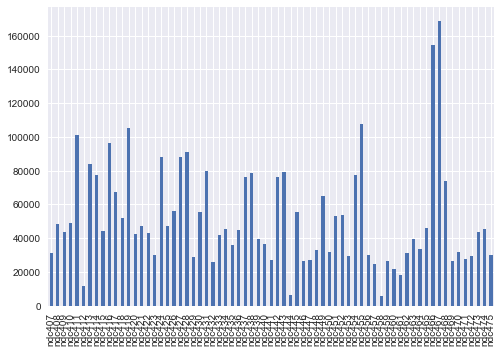

In [75]:
#sequencing depth by sample
seq_freq.loc[:, "ndc407":"ndc475"].sum().plot(kind="bar")
plt.show()

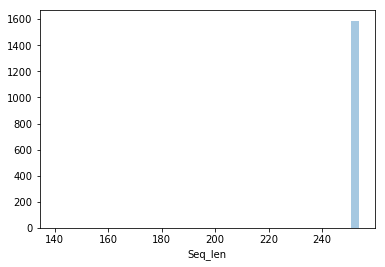

In [16]:
#plot distribution of sequence lengths
seq_freq["Seq_len"] = seq_freq.index.str.len()
sns.distplot(seq_freq["Seq_len"], kde=False)
plt.show()

In [17]:
#merge taxa and seq tables
otu = pd.merge(taxa, seq_freq, left_index=True, right_index=True)

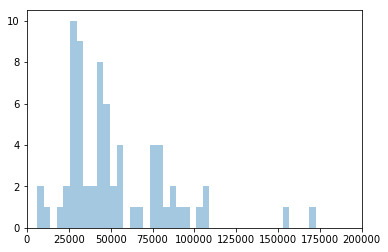

In [18]:
#Distribution of sequencing depth over all sequences
sns.distplot(otu.sum(), kde=False, bins=100)
plt.xlim(0,200000)
plt.show()

In [19]:
#filter out spurious sequences based on length
otu_trim = otu[otu["Seq_len"] >= 252]
otu_trim = otu_trim[otu_trim["Seq_len"] <= 254]
otu_trim["total_abundance"] = otu_trim.loc[:,"ndc407":"ndc475"].sum(axis=1)
otu_trim["num_samples"] = (otu_trim.loc[:,"ndc407":"ndc475"]>0).sum(axis=1)

In [20]:
otu_trim_pseudo = otu_trim.copy()
otu_trim_pseudo.loc[:, "ndc407":"ndc475"] = otu_trim_pseudo.loc[:, "ndc407":"ndc475"] +1
otu_trim_relfreq = otu_trim.copy()
otu_trim_relfreq.loc[:, "ndc407":"ndc475"] = otu_trim_relfreq.loc[:, "ndc407":"ndc475"]/otu_trim_relfreq.loc[:, "ndc407":"ndc475"].sum()
#sum of rel. abundances
otu_trim_relfreq["total_rel_abundance"] = otu_trim_relfreq.loc[:, "ndc407":"ndc475"].sum(axis=1)
print(otu_trim_relfreq.shape) 
print(otu_trim_relfreq["total_abundance"].sum())

(1588, 79)
3593206


In [21]:
#filtering based on number of samples each seq var is in and the %reads it accounts for if only in one sample
otu_trim_relfreq_filtered = otu_trim_relfreq[(otu_trim_relfreq.num_samples > 1)|(otu_trim_relfreq.total_rel_abundance > 0.05)].drop("Seq_len", axis=1)
otu_trim_relfreq_filtered.loc[:, "ndc407":"ndc475"] = otu_trim_relfreq_filtered.loc[:, "ndc407":"ndc475"]/otu_trim_relfreq_filtered.loc[:, "ndc407":"ndc475"].sum()
print(otu_trim_relfreq_filtered.shape)
print(otu_trim_relfreq_filtered["total_abundance"].sum())

(984, 78)
3536266


In [22]:
otu_trim_relfreq_extra_filtered = otu_trim_relfreq[(otu_trim_relfreq.num_samples > 4)|(otu_trim_relfreq.total_rel_abundance > 0.15)].drop("Seq_len", axis=1)
otu_trim_relfreq_extra_filtered.loc[:, "ndc407":"ndc475"] = otu_trim_relfreq_extra_filtered.loc[:, "ndc407":"ndc475"]/otu_trim_relfreq_extra_filtered.loc[:, "ndc407":"ndc475"].sum()

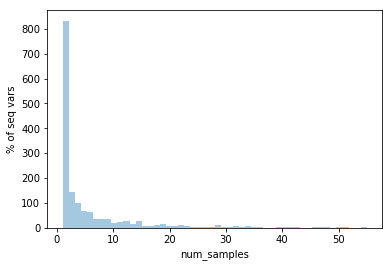

In [23]:
sns.distplot(otu_trim_relfreq.num_samples, kde=False)
plt.ylabel("% of seq vars")
plt.show()

In [24]:
# in more than one sample
dfs = []
dfs_count = []
dfs_pseudo = []
l = ["Phylum","Class", "Order", "Family", "Genus"]
for i, j in enumerate(l):
    otu_trim_relfreq_group = otu_trim_relfreq_filtered.dropna(subset=l[:i+1])
    otu_trim_group = otu_trim.dropna(subset=l[:i+1])
    print(j)
    print("# seq vars: ", otu_trim_relfreq_group.shape[0])
    print("# total reads: ", otu_trim_relfreq_group["total_abundance"].sum())
    
    grouped = otu_trim_relfreq_group.groupby(j).sum()
    grouped_counts = otu_trim_group.groupby(j).sum()
    grouped["num_samples"] = (grouped.loc[:,"ndc407":"ndc475"]>0).sum(axis=1)
    grouped.loc[:, "ndc407":"ndc475"] = grouped.loc[:, "ndc407":"ndc475"]/grouped.loc[:, "ndc407":"ndc475"].sum()
    dfs.append(grouped.loc[:,"ndc407":"ndc475"])
    dfs_count.append(grouped_counts[grouped_counts.index.isin(grouped.index)].loc[:,"ndc407":"ndc475"])
    dfs_pseudo.append(grouped_counts[grouped_counts.index.isin(grouped.index)].loc[:,"ndc407":"ndc475"] + 1)
    print("# classifications: ", grouped.shape[0])

for df in dfs:
    df.to_csv("abundances_by_tax_level_relfreq/{}_otu_table.csv".format(df.index.name))
for df_count in dfs_count:
    df_count.to_csv("abundances_by_tax_level_counts/{}_otu_table.csv".format(df_count.index.name))
for df_pseudo in dfs_pseudo:
    df_pseudo.to_csv("abundances_by_tax_level_pseudocounts/{}_otu_table.csv".format(df_count.index.name))



Phylum
# seq vars:  983
# total reads:  3536217
# classifications:  11
Class
# seq vars:  981
# total reads:  3535514
# classifications:  22
Order
# seq vars:  979
# total reads:  3535471
# classifications:  28
Family
# seq vars:  954
# total reads:  3492992
# classifications:  46
Genus
# seq vars:  750
# total reads:  3268274
# classifications:  146


In [25]:
# high confidence otus: otu in > 25% of samples
dfs = []
dfs_count = []
dfs_pseudo = []
l = ["Phylum","Class", "Order", "Family", "Genus"]
for i, j in enumerate(l):
    otu_trim_relfreq_group = otu_trim_relfreq_filtered.dropna(subset=l[:i+1])
    otu_trim_group = otu_trim.dropna(subset=l[:i+1])
    print(j)
    print("# seq vars: ", otu_trim_relfreq_group.shape[0])
    print("# total reads: ", otu_trim_relfreq_group["total_abundance"].sum())
    
    grouped = otu_trim_relfreq_group.groupby(j).sum()
    grouped_counts = otu_trim_group.groupby(j).sum()
    grouped["num_samples"] = (grouped.loc[:,"ndc407":"ndc475"]>0).sum(axis=1)
    grouped = grouped[grouped["num_samples"] > 0.25*max(grouped.num_samples)]
    grouped.loc[:, "ndc407":"ndc475"] = grouped.loc[:, "ndc407":"ndc475"]/grouped.loc[:, "ndc407":"ndc475"].sum()
    dfs.append(grouped.loc[:,"ndc407":"ndc475"])
    dfs_count.append(grouped_counts[grouped_counts.index.isin(grouped.index)].loc[:,"ndc407":"ndc475"])
    dfs_pseudo.append(grouped_counts[grouped_counts.index.isin(grouped.index)].loc[:,"ndc407":"ndc475"] + 1)
    print("# classifications: ", grouped.shape[0])

for df in dfs:
    df.to_csv("abundances_by_tax_level_relfreq_high_confidence/{}_otu_table.csv".format(df.index.name))
for df_count in dfs_count:
    df_count.to_csv("abundances_by_tax_level_counts_high_confidence/{}_otu_table.csv".format(df_count.index.name))
for df_pseudo in dfs_pseudo:
    df_pseudo.to_csv("abundances_by_tax_level_pseudocounts_high_confidence/{}_otu_table.csv".format(df_count.index.name))


Phylum
# seq vars:  983
# total reads:  3536217
# classifications:  7
Class
# seq vars:  981
# total reads:  3535514
# classifications:  13
Order
# seq vars:  979
# total reads:  3535471
# classifications:  13
Family
# seq vars:  954
# total reads:  3492992
# classifications:  27
Genus
# seq vars:  750
# total reads:  3268274
# classifications:  75


In [26]:
dfs = []
l = ["Phylum","Class", "Order", "Family", "Genus"]
for i, j in enumerate(l):
    otu_trim_relfreq_group = otu_trim_relfreq_filtered.dropna(subset=l[:i+1])
    print(j)
    print("# seq vars: ", otu_trim_relfreq_group.shape[0])
    print("# total reads: ", otu_trim_relfreq_group["total_abundance"].sum())
    
    grouped = otu_trim_relfreq_group.groupby(j).sum()
    
    grouped.loc[:, "ndc407":"ndc475"] = grouped.loc[:, "ndc407":"ndc475"]/grouped.loc[:, "ndc407":"ndc475"].sum()
    grouped["num_samples"] = (grouped.loc[:,"ndc407":"ndc475"]>0).sum(axis=1)
    dfs.append(grouped.loc[:,"ndc407":"ndc475"])
    print("# classifications: ", grouped.shape[0])

Phylum
# seq vars:  983
# total reads:  3536217
# classifications:  11
Class
# seq vars:  981
# total reads:  3535514
# classifications:  22
Order
# seq vars:  979
# total reads:  3535471
# classifications:  28
Family
# seq vars:  954
# total reads:  3492992
# classifications:  46
Genus
# seq vars:  750
# total reads:  3268274
# classifications:  146


In [27]:
otu_trim_pseudo_filtered = otu_trim_pseudo[otu_trim_pseudo.index.isin(otu_trim_relfreq_filtered.index)]
otu_trim_filtered = otu_trim[otu_trim.index.isin(otu_trim_relfreq_filtered.index)]



In [28]:
otu_trim_extra_filtered = otu_trim[otu_trim.index.isin(otu_trim_relfreq_extra_filtered.index)]
otu_trim_extra_filtered.loc[:,"ndc407":"ndc475"].to_csv("all_filtered_otu_table_counts_extra.csv")

In [29]:
otu_trim_extra_filtered.shape

(516, 78)

In [30]:
otu_trim_filtered.shape

(984, 78)

In [31]:
dfs_count = []
l = ["Phylum","Class", "Order", "Family", "Genus"]
for i, j in enumerate(l):
    otu_trim_group = otu_trim_filtered.dropna(subset=l[:i+1])
    print(j)
    print("# seq vars: ", otu_trim_group.shape[0])
    print("# total reads: ", otu_trim_group["total_abundance"].sum())
    grouped = otu_trim_group.groupby(j).sum()
    dfs_count.append(grouped.loc[:,"ndc407":"ndc475"])
    print("# classifications: ", grouped.shape[0])

Phylum
# seq vars:  983
# total reads:  3536217
# classifications:  11
Class
# seq vars:  981
# total reads:  3535514
# classifications:  22
Order
# seq vars:  979
# total reads:  3535471
# classifications:  28
Family
# seq vars:  954
# total reads:  3492992
# classifications:  46
Genus
# seq vars:  750
# total reads:  3268274
# classifications:  146


In [33]:
#saving otu tables separately, collapsed to taxa levels
for df in dfs:
    df.to_csv("abundances_by_tax_level_relfreq/{}_otu_table.csv".format(df.index.name))
for df_count in dfs_count:
    df_count.to_csv("abundances_by_tax_level_counts/{}_otu_table.csv".format(df_count.index.name))
#saving all sequence variants in relative abundance
otu_trim_relfreq_filtered.loc[:,"ndc407":"ndc475"].to_csv("all_filtered_otu_table.csv")
#saving pseudocounts
otu_trim_pseudo_filtered.loc[:,"ndc407":"ndc475"].to_csv("all_filtered_otu_table_pseudocounts.csv")
#saving counts
otu_trim_filtered.loc[:,"ndc407":"ndc475"].to_csv("all_filtered_otu_table_counts.csv")

In [34]:
metadata = pd.read_csv("sample_metadata.csv", index_col=0)

In [35]:
seq_freq.head()

,ndc407,ndc408,ndc409,ndc410,ndc411,ndc412,ndc413,ndc414,ndc415,ndc416,...,ndc467,ndc468,ndc469,ndc471,ndc470,ndc472,ndc473,ndc474,ndc475,Seq_len
TACAGAGGTCTCAAGCGTTGTTCGGAATCACTGGGCGTAAAGCGTGCGTAGGCTGTTTCGTAAGTCGTGTGTGAAAGGCGCGGGCTCAACCCGCGGACGGCACATGATACTGCGAGACTAGAGTAATGGAGGGGGAACCGGAATTCTCGGTGTAGCAGTGAAATGCGTAGATATCGAGAGGAACACTCGTGGCGAAGGCGGGTTCCTGGACATTAACTGACGCTGAGGCACGAAGGCCAGGGGAGCGAAAGGG,1011,41,49,1154,653,202,0,0,0,27,...,70404,3061,0,826,36,181,865,0,0,253
TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGATGGATGTTTAAGTCAGTTGTGAAAGTTTGCGGCTCAACCGTAAAATTGCAGTTGATACTGGATATCTTGAGTGCAGTTGAGGCAGGCGGAATTCGTGGTGTAGCGGTGAAATGCTTAGATATCACGAAGAACTCCGATTGCGAAGGCAGCCTGCTAAGCTGCAACTGACATTGAGGCTCGAAAGTGTGGGTATCAAACAGG,46,0,0,754,4720,473,0,0,0,0,...,0,123,0,577,0,2674,2229,0,0,253
AACGTAGGTCACAAGCGTTGTCCGGAATTACTGGGTGTAAAGGGAGCGCAGGCGGGAAGACAAGTTGGAAGTGAAATCTATGGGCTCAACCCATAAACTGCTTTCAAAACTGTTTTTCTTGAGTAGTGCAGAGGTAGGCGGAATTCCCGGTGTAGCGGTGGAATGCGTAGATATCGGGAGGAACACCAGTGGCGAAGGCGGCCTACTGGGCACCAACTGACGCTGAGGCTCGAAAGTGTGGGTAGCAAACAGG,1600,2776,1173,2774,5103,504,4736,4197,0,0,...,58,1881,872,2331,745,1290,1700,1592,980,253
TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGGCGGACGCTTAAGTCAGTTGTGAAAGTTTGCGGCTCAACCGTAAAATTGCAGTTGATACTGGGTGTCTTGAGTACAGTAGAGGCAGGCGGAATTCGTGGTGTAGCGGTGAAATGCTTAGATATCACGAAGAACTCCGATTGCGAAGGCAGCTTGCTGGACTGTAACTGACGCTGATGCTCGAAAGTGTGGGTATCAAACAGG,0,1707,1527,233,810,0,2193,2110,0,163,...,406,0,1167,184,1357,331,0,4025,5573,253
TACAGAGGTCTCAAGCGTTGTTCGGAATCACTGGGCGTAAAGCGTGCGTAGGCGGTTTCGTAAGTCGTGTGTGAAAGGCGGGGGCTCAACCCCCGGACTGCACATGATACTGCGAGACTAGAGTAATGGAGGGGGAACCGGAATTCTCGGTGTAGCAGTGAAATGCGTAGATATCGAGAGGAACACTCGTGGCGAAGGCGGGTTCCTGGACATTAACTGACGCTGAGGCACGAAGGCCAGGGGAGCGAAAGGG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,253


In [40]:
metadata.shape

(997, 20)